# MedVis 23 - Exercise Sheet 1 - Additional Material


---



# Preparation

Here the necessary libraries are included.

In [2]:
!pip install scipy
!pip install pydicom

import os # for file-handling
import numpy as np # maths
import matplotlib.pyplot as plt # plotting
from scipy import ndimage # image processing
from pydicom import dcmread # reading DICOM files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00


# Example of how to read and display a DICOM dataset

Here is some sample code how medical image data can be read and displayed using Python. The dataset is from Jeff Mather ([DICOM Example Files ](https://de.mathworks.com/matlabcentral/fileexchange/2762-dicom-example-files), MATLAB Central File Exchange. Retrieved April 8, 2022.).

As you may know, medical imaging like CT and MRI often produce volume data by generating cross-sectional slices through the body. One way to view this data is by visualising each slice. In our DICOM data set each slice is saved as a separate file. Therefore, you first have to traverse the slice files to read and then save them in an 3D array. This is done by the function read_dcm_volume. You can then choose one slice of this volume by entering its index, e.g. `dcm_volume[:,:,8]`.

Alternatively, you can read one specific slice file right away using its file name, e.g. `dcmread("dataset1/brain_011.dcm")`.

To display a slice using a python figure, we have to convert it to an pixel array, e.g. `np.array(dcm_slice.pixel_array)`.

You can see the example code below. It might be useful for the following tasks.


Imaging Modality: MR
Slice Thickness in z-direction: 5.00000
Pixel Spacing: [0.859375, 0.859375]
Grid Size (Rows, Columns): 256 , 256
Smallest Image Pixel Value: 0
Largest Image Pixel Value: 901


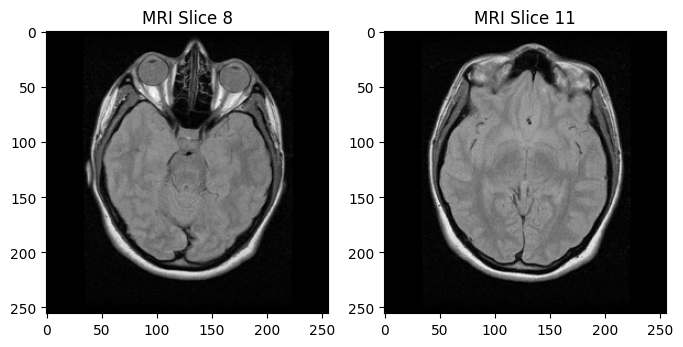

In [4]:
# Read a volume and convert to numpy array
def read_dcm_volume(name):
    volume_img = []
    for file in sorted(os.listdir(name)):
        dcm_slice = dcmread(os.path.join(name, file))
        volume_img.append(dcm_slice.pixel_array)
    return np.transpose(np.array(volume_img),(1,2,0))


# load the volume
dcm_volume = read_dcm_volume('/opt/google/drive/dicom_data') # make sure you have the correct path
# extract slice 8 in z-direction
img1 = dcm_volume[:,:,8]


# load one slice
dcm_slice = dcmread("/opt/google/drive/dicom_data/brain_011.dcm") # make sure you have the correct path
# convert it to numpy array for plotting the image
img2 = np.array(dcm_slice.pixel_array)


# Create a figure (window)
fig = plt.figure(figsize=(8,4))

# display using gray levels
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('MRI Slice 8')
ax1.imshow(img1, cmap='gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('MRI Slice 11')
ax2.imshow(img2, cmap='gray')

# Extract and print the required parameters
print("Imaging Modality:", dcm_slice.Modality)
print("Slice Thickness in z-direction:", dcm_slice.SliceThickness)
print("Pixel Spacing:", dcm_slice.PixelSpacing)
print("Grid Size (Rows, Columns):", dcm_slice.Rows, ",", dcm_slice.Columns)
print("Smallest Image Pixel Value:", dcm_slice.SmallestImagePixelValue)
print("Largest Image Pixel Value:", dcm_slice.LargestImagePixelValue)











# The problem of anisotrophy

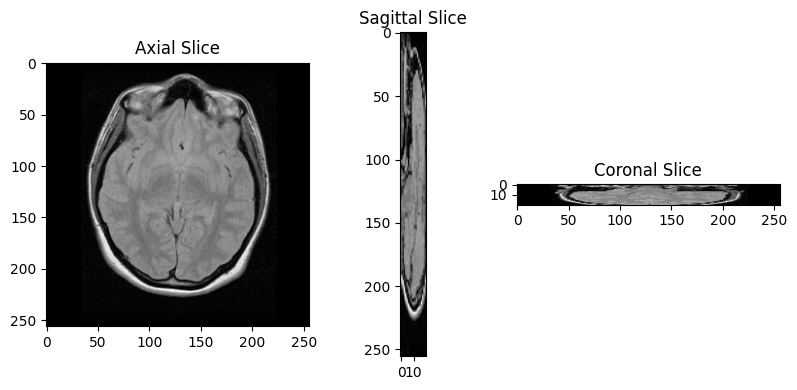

In [5]:
# Given dcm_volume is your 3D image data with size [256, 256, 20]


axial_slice_index = 10  # Choose a middle slice index for axial view
sagittal_slice_index = 128  # Choose a middle slice index for sagittal view
coronal_slice_index = 128  # Choose a middle slice index for coronal view

# Create a figure (window)
fig = plt.figure(figsize=(8, 4))

# Axial Slice
axial = plt.subplot(1, 3, 1)
axial.set_title('Axial Slice')
axial.imshow(dcm_volume[:, :, axial_slice_index], cmap='gray')

# Sagittal Slice
sagittal = plt.subplot(1, 3, 2)
sagittal.set_title('Sagittal Slice')
sagittal.imshow(dcm_volume[:, sagittal_slice_index, :], cmap='gray')

# Coronal Slice
coronal = plt.subplot(1, 3, 3)
coronal.set_title('Coronal Slice')
coronal.imshow(dcm_volume[coronal_slice_index, :, :].T, cmap='gray')  # Transpose for correct orientation

plt.tight_layout()
plt.show()


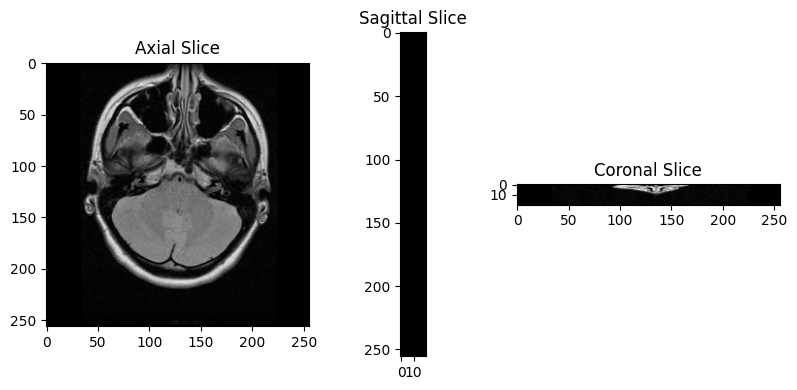

In [8]:
# Given dcm_volume is your 3D image data with size [256, 256, 20]


axial_slice_index = 5  # Choose an early slice index for axial view
sagittal_slice_index = 10  # Choose an initial slice index for the sagittal view
coronal_slice_index = 10 # Choose an initial slice index for coronal view

# Create a figure (window)
fig = plt.figure(figsize=(8, 4))

# Axial Slice
axial = plt.subplot(1, 3, 1)
axial.set_title('Axial Slice')
axial.imshow(dcm_volume[:, :, axial_slice_index], cmap='gray')

# Sagittal Slice
sagittal = plt.subplot(1, 3, 2)
sagittal.set_title('Sagittal Slice')
sagittal.imshow(dcm_volume[:, sagittal_slice_index, :], cmap='gray')

# Coronal Slice
coronal = plt.subplot(1, 3, 3)
coronal.set_title('Coronal Slice')
coronal.imshow(dcm_volume[coronal_slice_index, :, :].T, cmap='gray')  # Transpose for correct orientation

plt.tight_layout()
plt.show()

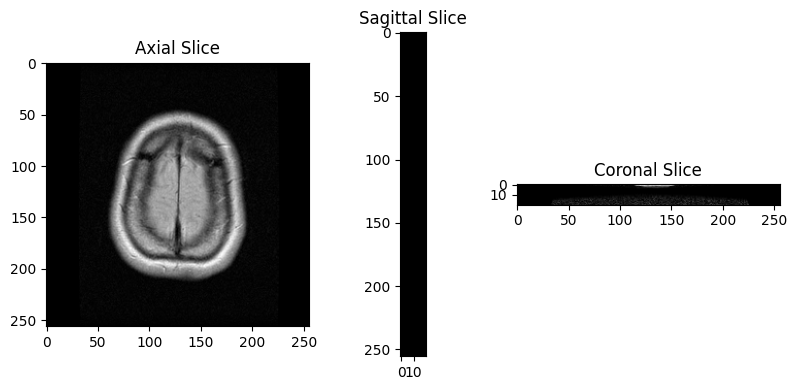

In [9]:
# Given dcm_volume is your 3D image data with size [256, 256, 20]


axial_slice_index = 19  # Choose a later slice index for axial view
sagittal_slice_index = 250  # Choose a later initial slice index for the sagittal view
coronal_slice_index = 254 # Choose an later slice index for coronal view

# Create a figure (window)
fig = plt.figure(figsize=(8, 4))

# Axial Slice
axial = plt.subplot(1, 3, 1)
axial.set_title('Axial Slice')
axial.imshow(dcm_volume[:, :, axial_slice_index], cmap='gray')

# Sagittal Slice
sagittal = plt.subplot(1, 3, 2)
sagittal.set_title('Sagittal Slice')
sagittal.imshow(dcm_volume[:, sagittal_slice_index, :], cmap='gray')

# Coronal Slice
coronal = plt.subplot(1, 3, 3)
coronal.set_title('Coronal Slice')
coronal.imshow(dcm_volume[coronal_slice_index, :, :].T, cmap='gray')  # Transpose for correct orientation

plt.tight_layout()
plt.show()